# Code Challenge Review 

This notebook has tasks that will help data science students prepare for their Mod 2 code challenge.

The first activity we will do is to get in groups and try to tackle the following tasks:



# Review

 ## 1. What are z-scores? Why would you use them? What do they have to do with distributions? ##
     A Z-score is a numerical measurement in statistics of a values relationship to the mean(average) of a groups values, measuresd in terms of standard deviation from the mean. It is also known as the 'standard score', it gives you an idea of how far from the mean the data point is. 
     A z-score tells you where the score lies on a normal distribution curve. 
     -z-scores are used when you want to know whther your sample comes from a particular population. 
     -they are used only for tests related to the mean 
     

In [2]:
import numpy as np

In [3]:
daves_data = np.array([35.73,29.63,35.84,37.21,31.49,31.71,41.16,35.63,39.9,38.6,28.65,29.38,38.9,37.67,31.66,29.09,35.48,33.64,31.13,30.87,33.55,24.09,39.32,37.96,25.79])

In [4]:
daves_friends_data = np.array([22.8,22.05,20.33,28.42,27.21,20.29,18.22,24.87,22.18,21.2,23.23,13.52,24.1,32.6,16.73,22.38,23.83,26.71,23.03,22.28,34.07,18.65,28.39,25.21,17.93])

In [5]:
daves_data.mean()

33.7632

In [6]:
daves_data.std()

4.4855159970732466

In [7]:
z_score = (daves_data - daves_data.mean())/daves_data.std()
z_score

array([ 0.43847798, -0.92145475,  0.46300136,  0.76842887, -0.50678673,
       -0.45773998,  1.64904105,  0.416184  ,  1.36813691,  1.07831518,
       -1.13993574, -0.97718969,  1.14519712,  0.87098118, -0.46888697,
       -1.04184223,  0.38274303, -0.02746618, -0.58704506, -0.6450094 ,
       -0.04753076, -2.15654119,  1.23883183,  0.93563372, -1.77754354])

In [8]:
print(daves_friends_data.mean())
print(daves_friends_data.std())
z_score2= (daves_friends_data - daves_friends_data.mean())/daves_friends_data.std()
print(z_score2)

23.2092
4.607606684603191
[-0.08880966 -0.25158397 -0.62487973  1.1309125   0.86830328 -0.63356102
 -1.08281812  0.36044743 -0.22336976 -0.43606153  0.00451427 -2.10287046
  0.19333247  2.03810799 -1.40619641 -0.17996328  0.13473372  0.75978707
 -0.03889221 -0.20166652  2.35714564 -0.98949418  1.12440153  0.43423845
 -1.14575752]


# 2. What is the central limit theorem? How does is relate to distributions?
 ## CLT establishes that, in some situations, when independent random variables are added, their properly normalised sum tends toward a normal distribution('bell curve') even if original variables themselves are not normally distributed. 
 ## It is a sampling distribution of the sample as means approaches a normal distribution as the sample size gets larger, no matter the shape of the population distribution. 
 ## It relates to distributions because regardless of the variables distribution in the actual population the sampling mean will tend to approximate the normal distribution. 


In [9]:
#add steps on how to conduct CLT
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import scipy.stats as st
import pandas as pd
np.random.seed(0) #need to be able to reproduce

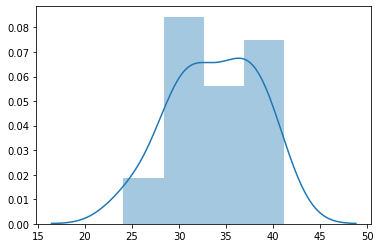

In [10]:
sns.distplot(daves_data)

In [11]:
st.normaltest(daves_data)

NormaltestResult(statistic=1.1696492631127549, pvalue=0.557203569167236)

Now I need to sample with replacement

In [12]:
def sample_replace(daves_data, n): 
    sample = []
    x = np.random.choice(daves_data)
    sample.append(x)
    
    return sample
test_sample = sample_replace(daves_data, 25)
print(test_sample[:5])

[38.9]


Get a sample mean

In [13]:
def sample_mean(sample):
    return sum(sample)/len(sample)
test2_sample = sample_replace(daves_data, 25)
test2_sample_mean = sample_mean(test2_sample)
print(test2_sample_mean)

29.09


Now my attempt at creating a sample distribution to generate three arguments, dataset, size of sample and the size of distribution sample. 

In [14]:
def create_sample_dis(daves_data, dist_size=100, n=25):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = sample_replace(daves_data, n)
        sample_mean1 = sample_mean(sample)
        sample_dist.append(sample_mean1)
test_sample_dist = create_sample_dis(daves_data)
print(test_sample_dist)

None


# I feel like this has happened because the distribution in `daves_data` is normal, and CLT looks for non-normal

# 3. What are confidence intervals? How do you calculate them? 
  ## Confidence Intervals - range of values we are fairly sure our truel value lies in. 

Confidence interval - we do not know population variance or standard deviation here! 

In [15]:
import numpy as np 
import scipy.stats as stats


In [16]:
def mean_conf_int(data, confidence=.95): 
    a = 1*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se*scipy.stats.t.ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [17]:
x_bar = np.mean(daves_data)
s= np.std(daves_data, ddof=1)
print(x_bar, s)

33.7632 4.578010594133657


Now need to calculate confidence intervals using a t-distribution and our various parameters, 4 parameters are required here. 
1. sample mean
2. sample st dev
3. degrees of freedom
4. confidence level 

In [18]:
stats.t.interval(alpha =.05, df=len(daves_data)-1, loc=x_bar, scale=s)

(33.47311052436443, 34.0532894755291)

# Do i need to run `daves_friends_data` here and make comparison?

# 4. How do you run a linear regression and output its summary table?


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [20]:
data = pd.read_csv('/Users/aqureshi/Desktop/DS_021720/code-challenge-review-mod-2-london/diamonds.csv', squeeze=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
x = np.asarray(data[['carat']])
y = np.asarray(data[['price']])


In [22]:
type(x)
type(y)

numpy.ndarray

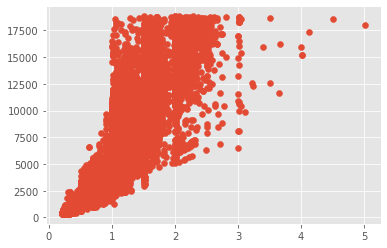

In [23]:
plt.scatter(x,y)

In [24]:
from sklearn.linear_model import LinearRegression 

In [25]:
model_skl = LinearRegression(fit_intercept=True)

In [26]:
model_skl.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
r2= model_skl.score(x,y)
r2 = r2.round(2)
r2

0.85

In [28]:
m= model_skl.coef_
b=model_skl.intercept_
print("The coefficient is ", m)
print("The intercept is ", b)
print("The r square is ", r2)

The coefficient is  [[7756.42561797]]
The intercept is  [-2256.36058005]
The r square is  0.85


In [29]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [30]:
y_hat = m*x + b

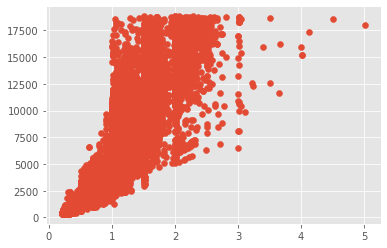

In [31]:
plt.scatter(x,y)

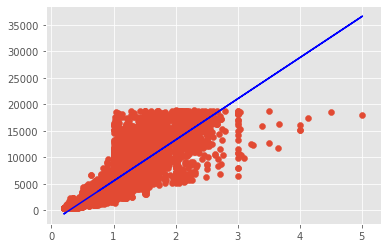

In [32]:
plt.plot(x,y_hat, '-', color='blue')
plt.scatter(x,y)

In [33]:
import statsmodels.api as sm # import statsmodels 

X = data["carat"] 
y = data['price']
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:35:06   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Repeat for a Multiple Regression

In [34]:
X = data.drop('price', axis=1)
Y = data['price']

In [35]:
X_dia_mult = data[['carat', 'depth']]
X_dia_mult.head()

,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3


In [36]:
X_dia_mult = sm.add_constant(X_dia_mult)
X_dia_mult.head()

,const,carat,depth
0,1.0,0.23,61.5
1,1.0,0.21,59.8
2,1.0,0.23,56.9
3,1.0,0.29,62.4
4,1.0,0.31,63.3


In [37]:
X_dia_sm_mult = sm.OLS(y, X_dia_mult)

#Results
X_dia_results = X_dia_sm_mult.fit()

In [38]:
X_dia_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:40:06   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4045.3332    286.205     14.134      0.000    3484.368    4606.298
carat       7765.1407     14.009    554.282      0.000    7737.682    7792.599
depth       -102.1653      4.635    -22.041      0.000    -111.251     -93.080
==============================================================================
Omnibus:                    14148.858   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148236.675
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      10.890   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

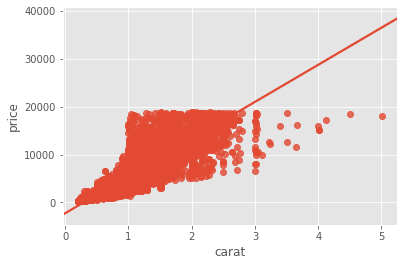

In [39]:
import seaborn as sns
sns.regplot(x = "carat", y = "price", data = data)

# 5. When running a statistical test (like a t-test), what kind of errors can you make?

When running a t-test you can get two types of errors: a type I and a type II. 
A type I error is the rejection of a true null hypothesis as the result of a test procedure. It is essentially thinking that something is there within your data when there isn't, or a false positive. 
A type II error is the non-rejection of a false null hypothesis, or a 'false negative'. Meaning when you think something is not there and it is, usually if a type II occurs you fail to reject the null at best. You can never say your hypothesis is fully true. 

# 6. How do you interpret a p-value?

A p-value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. A p value is usually between 0 and 1. 

### small p value <= .05 indicates strong evidence against the null hypothesis, in which we reject the null hypothesis. 

### large p value > .05 indicates weak evidence against the null hypothesis the null hypothesis, here the p value fails to reject the null hypothesis

# 7. Bayes Theorem: What are the three axioms? How do you calculate Bayes?

## 3 axioms: 
 ### 1. Probability of an event is >= 0, the probability of an event is between 0 and 1. 0 <= P(E) <= 1
 ### 2. Probabilities will sum to 1
 ### 3. Probabilities are additive

In [ ]:
Calculate Bayes by P(A|B) = [P(B|A)*P(A)]/P(B)


In [41]:
def bayes(p_a, p_b, p_b_given_a):
    p_a_given_b = (p_b_given_a*p_a)/p_b
    return p_a_given_b

Dave wants to eat dinner tonight. The probability of him making food at home is 75% and thus the probability of him ordering take out is 25%.

If he cooks at home there is a 50% chance he will make pasta, 20% chance he will eat chill, and 30% chance he will eat Thai.

If he orders out, there is a 70% chance he will order pasta, 20% chance he will order chili, and 10% chance he will order Thai.


In [44]:
p_b_given_a = (.75*.5) #eating pasta if he eats in
p_a = .75 # eat-in
p_b = .25 #take-out
p_a_given_b = .25*7 #order out and its pasta
bayes(p_a, p_b, p_b_given_a)
pasta = (p_b_given_a*p_a)/p_b
pasta

1.125

In [ ]:
pasta = (.75*.5*)